# DATA ANALYSIS TO CONTRIBUTE TO CLEANER TRANSPORTATION METHODS


## Importing libraries:

In [77]:
# data processing
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import pearsonr, linregress

# data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import plotly.graph_objects as go
from branca.element import Template, MacroElement
import plotly.offline as pyo

# to interact with operating system to save files
import os
from os.path import dirname

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Importing Cleaned Datasets


In [71]:
cleaned_stations_df = pd.read_csv("../Data/cleaned_stations_df.csv")
cleaned_trips_df = pd.read_csv("../Data/cleaned_trips_df.csv", parse_dates=["start_time"], low_memory=False)
cleaned_weather_df = pd.read_csv("../Data/cleaned_weather_df.csv")

print('Shape of Cleaned Station DF ', cleaned_stations_df.shape)
print('Shape of Cleaned Trips DF ', cleaned_trips_df.shape)
print('Shape of Cleaned Weather DF ', cleaned_weather_df.shape)


display(cleaned_stations_df.head())
display(cleaned_trips_df.head())
display(cleaned_weather_df.head())


Shape of Cleaned Station DF  (102, 16)
Shape of Cleaned Trips DF  (1765565, 13)
Shape of Cleaned Weather DF  (3287, 31)


station_id                     station_name  status        address   
0        2541  State Capitol @ 14th & Colorado  closed   Austin Texas  \
1        2538  Bullock Museum @ Congress & MLK  closed   Austin Texas   
2        2545          ACC - Rio Grande & 12th  closed   Austin Texas   
3        2546         ACC - West & 12th Street  closed   Austin Texas   
4        2564                 5th & San Marcos  closed   Austin Texas   

   city_asset_number property_type  number_of_docks power_type   
0                0.0             0              0.0          0  \
1                0.0             0              0.0          0   
2                0.0             0              0.0          0   
3                0.0             0              0.0          0   
4                0.0             0              0.0          0   

   footprint_length  footprint_width  council_district   
0               0.0              0.0                 1  \
1               0.0              0.0                 1   
2               0.0              0.0                 9   
3               0.0              0.0                 9   
4               0.0              0.0                 3   

                    modified_date    coordinates   
0  2021-01-04 12:00:00.000000 UTC  Austin, Texas  \
1  2021-01-04 12:00:00.000000 UTC  Austin, Texas   
2  2021-01-04 12:00:00.000000 UTC  Austin, Texas   
3  2021-01-04 12:00:00.000000 UTC  Austin, Texas   
4  2021-01-04 12:00:00.000000 UTC  Austin, Texas   

                       full_address       lat       lon  
0                     Austin, Texas  30.26759 -97.74299  
1                     Austin, Texas  30.26759 -97.74299  
2                     Austin, Texas  30.26759 -97.74299  
3  1231 W Ave, Austin, Texas, 78701  30.27646 -97.74822  
4                     Austin, Texas  30.26759 -97.74299

trip_id subscriber_type bike_id                 start_time   
0  9900285908          Annual     400  2014-10-26 14:12:00+00:00  \
1  9900289692           Daily     248  2015-10-02 21:12:01+00:00   
2  9900285987           Daily     446  2014-10-26 15:12:00+00:00   
3  9900285989           Daily     203  2014-10-26 15:12:00+00:00   
4  9900285991           Daily     101  2014-10-26 15:12:00+00:00   

   start_station_id                       start_station_name  end_station_id   
0              2823  Capital Metro HQ - East 5th at Broadway            2544  \
1              1006                         Zilker Park West            1008   
2              2712                  Toomey Rd @ South Lamar            2712   
3              2712                  Toomey Rd @ South Lamar            2712   
4              2712                  Toomey Rd @ South Lamar            2712   

            end_station_name  duration_minutes day_of_week      time month   
0  East 6th & Pedernales St.                10      Sunday  14:12:00   Oct  \
1               Nueces @ 3rd                39      Friday  21:12:01   Oct   
2    Toomey Rd @ South Lamar                31      Sunday  15:12:00   Oct   
3    Toomey Rd @ South Lamar                31      Sunday  15:12:00   Oct   
4    Toomey Rd @ South Lamar                30      Sunday  15:12:00   Oct   

   year  
0  2014  
1  2015  
2  2014  
3  2014  
4  2014

name    datetime  tempmax  tempmin  temp  feelslikemax   
0  Austin texas  2014-01-01     19.1      3.4  10.4          19.1  \
1  Austin texas  2014-01-02     11.7      1.7   6.5          11.7   
2  Austin texas  2014-01-03     13.1     -2.8   4.9          13.1   
3  Austin texas  2014-01-04     21.5      5.3  13.4          21.5   
4  Austin texas  2014-01-05     14.8      1.9   8.1          14.8   

   feelslikemin  feelslike  dew  humidity  ...  solarradiation  solarenergy   
0           2.4       10.2  4.3      67.0  ...             0.0          0.0  \
1          -2.2        4.4 -3.6      50.6  ...             0.0          0.0   
2          -2.8        4.2 -5.8      51.0  ...             0.0          0.0   
3           3.2       12.9  7.9      71.4  ...             0.0          0.0   
4          -2.1        5.2 -1.1      55.2  ...             0.0          0.0   

   uvindex              sunrise               sunset  moonphase   
0      0.0  2014-01-01T07:27:38  2014-01-01T17:41:46       0.00  \
1      0.0  2014-01-02T07:27:51  2014-01-02T17:42:29       0.04   
2      0.0  2014-01-03T07:28:03  2014-01-03T17:43:13       0.08   
3      0.0  2014-01-04T07:28:12  2014-01-04T17:43:58       0.11   
4      0.0  2014-01-05T07:28:21  2014-01-05T17:44:44       0.15   

         conditions                           description               icon   
0  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day  \
1             Clear  Clear conditions throughout the day.          clear-day   
2             Clear  Clear conditions throughout the day.          clear-day   
3  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day   
4  Partially cloudy            Clearing in the afternoon.  partly-cloudy-day   

                                            stations  
0  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
1  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
2  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
3  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
4  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  

[5 rows x 31 columns]

In [61]:
cleaned_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         102 non-null    int64  
 1   station_name       102 non-null    object 
 2   status             102 non-null    object 
 3   address            102 non-null    object 
 4   city_asset_number  102 non-null    float64
 5   property_type      102 non-null    object 
 6   number_of_docks    102 non-null    float64
 7   power_type         102 non-null    object 
 8   footprint_length   102 non-null    float64
 9   footprint_width    102 non-null    float64
 10  council_district   102 non-null    int64  
 11  modified_date      102 non-null    object 
 12  coordinates        102 non-null    object 
 13  full_address       102 non-null    object 
 14  lat                102 non-null    float64
 15  lon                102 non-null    float64
dtypes: float64(6), int64(2), o

In [62]:
cleaned_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765565 entries, 0 to 1765564
Data columns (total 13 columns):
 #   Column              Dtype              
---  ------              -----              
 0   trip_id             int64              
 1   subscriber_type     object             
 2   bike_id             object             
 3   start_time          datetime64[ns, UTC]
 4   start_station_id    int64              
 5   start_station_name  object             
 6   end_station_id      int64              
 7   end_station_name    object             
 8   duration_minutes    int64              
 9   day_of_week         object             
 10  time                object             
 11  month               object             
 12  year                int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(7)
memory usage: 175.1+ MB


In [63]:
cleaned_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3287 non-null   object 
 1   datetime          3287 non-null   object 
 2   tempmax           3287 non-null   float64
 3   tempmin           3287 non-null   float64
 4   temp              3287 non-null   float64
 5   feelslikemax      3287 non-null   float64
 6   feelslikemin      3287 non-null   float64
 7   feelslike         3287 non-null   float64
 8   dew               3287 non-null   float64
 9   humidity          3287 non-null   float64
 10  precip            3287 non-null   float64
 11  precipprob        3287 non-null   int64  
 12  precipcover       3287 non-null   float64
 13  snow              3287 non-null   float64
 14  snowdepth         3287 non-null   float64
 15  windgust          3287 non-null   float64
 16  windspeed         3287 non-null   float64


# Exploratory Data Analysis
1. Correlation Plots
2. Bike Usage Frequency Analysis
3. Bike Station Activity
4. Popularity of Subscription Types

## Correlation Plots
- Investigate relationship between columns in both datasets

In [64]:
# Find numeric columns in stations_df and convert to list
numeric_col_stations_list = cleaned_stations_df.select_dtypes(include=np.number).columns.tolist()

# Replace underscores in column names with a space 
converter = lambda x: x.replace('_', ' ')
numeric_col_stations_list = list(map(converter, numeric_col_stations_list))

In [65]:
# Find numeric columns in trips_df and convert to list
numeric_col_trips_list = cleaned_trips_df.select_dtypes(include=np.number).columns.tolist()

# Replace underscores in column names with a space 
numeric_col_trips_list = list(map(converter, numeric_col_trips_list))

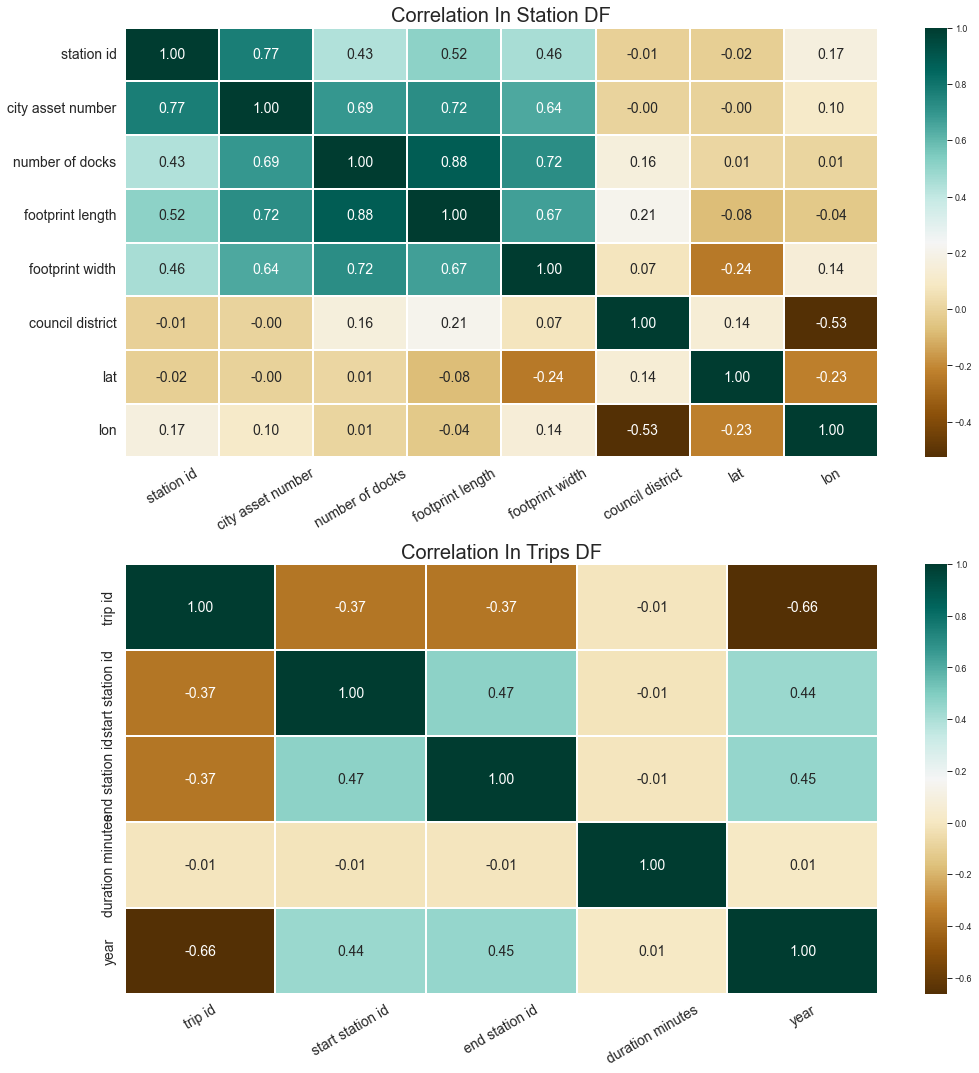

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

corr_data_stations = cleaned_stations_df.corr()
sns.heatmap(corr_data_stations, 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True, 
            annot_kws={"size":14},
            ax=axs[0])

axs[0].set_title("Correlation In Station DF",fontsize = 20)
axs[0].set_xticklabels(numeric_col_stations_list, rotation = 30, fontsize=14)
axs[0].set_yticklabels(numeric_col_stations_list,fontsize=14)

corr_data_trips = cleaned_trips_df.corr()
sns.heatmap(corr_data_trips, 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True,
            annot_kws={"size":14},
            ax=axs[1])

axs[1].set_title("Correlation In Trips DF", fontsize = 20)
axs[1].set_xticklabels(numeric_col_trips_list, rotation = 30,fontsize=14)
axs[1].set_yticklabels(numeric_col_trips_list,fontsize=14)


# Save the figure on Windows
# curr_dir = os.getcwd()
# parent_folder = dirname(curr_dir) 
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\Correlation_plots.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\Correlation_plots.png")

# Save the figure on Mac/Linux
curr_dir = os.getcwd()
parent_folder = dirname(curr_dir) 
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Correlation_plots.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Correlation_plots.png")

plt.tight_layout()
plt.show()


From the correlation plots above we can infer the following:  
1) In the stations_df, the number of docks at each station, is highly positively corelated to the footprint length and width.  
This makes sense as the larger the dock area, the more docks that can be placed.  
2) In the stations_df, we see that that the footprint length and width are also highly positively correlated.  
3) In the trips_df, we see that the trip id and the year is highly negatively correlated.  
However, this is not a very significant relationship as the actual value of the trip_id is not hugely relevant.  

## Bike Quantity Across All Years
We will look at how the Metro Bike fleet has changed over the years 2014-2022.

In [67]:
# Number of unique bike_id for each year
num_bikes = cleaned_trips_df.groupby(['year'])[['bike_id']].nunique().reset_index().rename(columns={'bike_id':'bike_qty'})

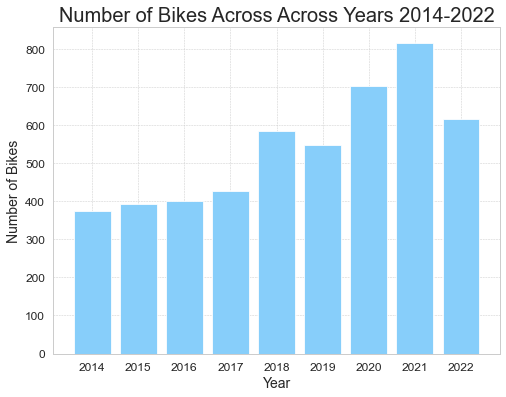

<Figure size 432x288 with 0 Axes>

In [68]:
x = num_bikes['year']
y = num_bikes['bike_qty']
plt.figure(figsize = (8,6))
plt.xticks(np.arange(2014,2023), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Bikes', fontsize = 14)
plt.title('Number of Bikes Across Across Years 2014-2022', fontsize=20)
plt.bar(x,y, color='lightskyblue')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Number_of_bikes.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Number_of_bikes.png")

# Save files on Mac/Linux
curr_dir = os.getcwd()
parent_folder = dirname(curr_dir) 
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Number_of_bikes.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Number_of_bikes.png")


We see that the size of the Metro Bike fleet has almost doubled since 2014 compared to 2022.  

## **Bicycle Usage Frequency Analysis:**
1. Number of rides per **year** across all the years
2. Number of rides each **month** across all the years
2.   Average count of rides per **month** across all the years
3.   Average count of rides per **day of week** across all the months and years
4. Average count of rides **during the day** (in the morning compared to the afternoon)across all the months and years

### 1. Number of Rides per Year

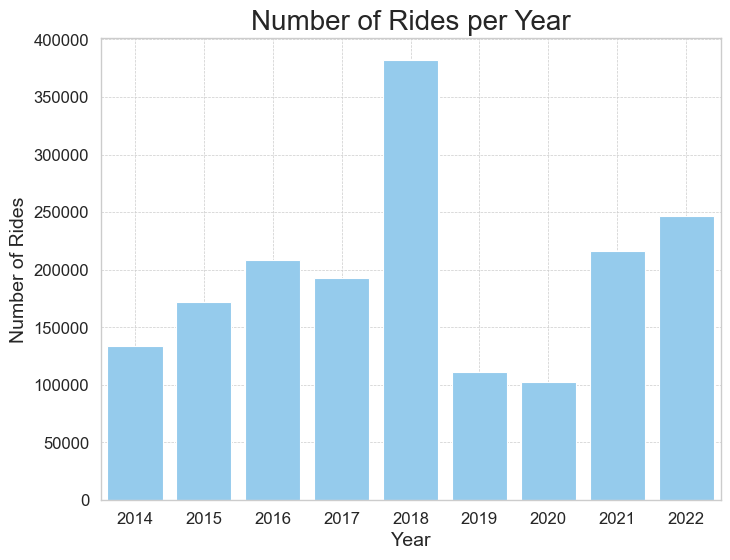

In [72]:
# Calculate the number of rides per year
rides_per_year = cleaned_trips_df['year'].value_counts().sort_index()

# create a bar plot to visualise rides_per_year
plt.figure(figsize=(8, 6))
data = sns.barplot(x=rides_per_year.index, y=rides_per_year.values, color='lightskyblue')
data.set_title('Number of Rides per Year', fontsize=20)
data.set_xlabel('Year', fontsize=14)
data.set_ylabel('Number of Rides', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)

# Save the figure on Windows 
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Rides_per_year.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Rides_per_year.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Rides_per_year.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Rides_per_year.png")

plt.show()

### 2. Rides Per Month For Each Year

In [73]:
trips_per_month = cleaned_trips_df.groupby(['year', 'month']).size().reset_index(name='trips_count')
trips_per_month

year month  trips_count
0    2014   Apr        12624
1    2014   Aug         9415
2    2014   Dec         6426
3    2014   Feb         5297
4    2014   Jan         3358
..    ...   ...          ...
103  2022   Mar        22904
104  2022   May        20373
105  2022   Nov        22328
106  2022   Oct        31683
107  2022   Sep        29140

[108 rows x 3 columns]

In [78]:
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bar_traces = []
for year in trips_per_month['year'].unique():
    year_data = trips_per_month[trips_per_month['year'] == year]
    
    bar_trace = go.Bar(
        x=year_data['month'],
        y=year_data['trips_count'],
        name=str(year),
        hovertemplate='<b>Year:</b> ' + str(year) + '<br>' +
                      '<b>Month:</b> %{x}<br>' +
                      '<b>Trips:</b> %{y}<extra></extra>',
    )
    bar_traces.append(bar_trace)

pyo.init_notebook_mode() 

layout = go.Layout(
    title='Number of Rides per Month by Year',
    xaxis=dict(title='Month', categoryorder='array', categoryarray=months_order),
    yaxis=dict(title='Number of Rides'),
    title_x=0.5,
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(data=bar_traces, layout=layout)
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='black', gridcolor='Grey')
fig.update_yaxes(showline=True, linewidth=0.5, linecolor='black', gridcolor='Grey')

# Save files on Windows 
# if os.path.exists(parent_folder + "\\Figures"):
#     fig.write_image(parent_folder + "\\Figures\\Rides_per_month_by_year.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     fig.write_image(parent_folder + "\\Figures\\Rides_per_month_by_year.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    fig.write_image(parent_folder + "/Figures/Rides_per_month_by_year.png")
else:
    os.mkdir(parent_folder + "/Figures")
    fig.write_image(parent_folder + "/Figures/Rides_per_month_by_year.png")

fig.show()

### 3. Average Number of Rides Per Month

In [72]:
grouped_month_year = cleaned_trips_df.groupby(['month', 'year'])
rides_per_month_per_year = grouped_month_year.size().reset_index(name='num_rides')

cats = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_rides_per_month = round(rides_per_month_per_year.groupby('month')['num_rides'].mean()).reindex(cats)
avg_rides_per_month

month
Jan    10275.0
Feb    12642.0
Mar    26233.0
Apr    21402.0
May    18555.0
Jun    14464.0
Jul    14087.0
Aug    13286.0
Sep    18872.0
Oct    21526.0
Nov    14818.0
Dec    10013.0
Name: num_rides, dtype: float64

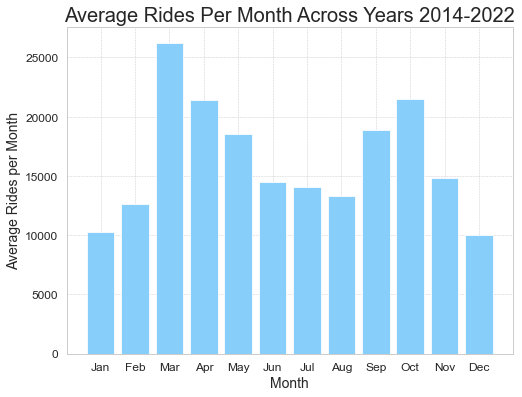

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize=(8, 6))
plt.bar(avg_rides_per_month.index, avg_rides_per_month, color='lightskyblue')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Rides per Month', fontsize=14)
plt.title('Average Rides Per Month Across Years 2014-2022', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)

plt.show()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Average_rides_per_month.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Average_rides_per_month.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Average_rides_per_month.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Average_rides_per_month.png")

### 4. Average Number of Rides Per Day of Week

In [74]:
weekdays_grouped = cleaned_trips_df.groupby(['day_of_week', 'year'])

counts = weekdays_grouped.size()

num_days = weekdays_grouped['start_time'].apply(lambda x: x.dt.date.nunique())

avg_trips_per_day = counts / num_days

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
overall_avg = avg_trips_per_day.groupby('day_of_week').mean().reindex(cats) 
overall_avg 

day_of_week
Monday       491.708313
Tuesday      463.054427
Wednesday    463.734519
Thursday     491.869013
Friday       573.875746
Saturday     688.677561
Sunday       591.696614
dtype: float64

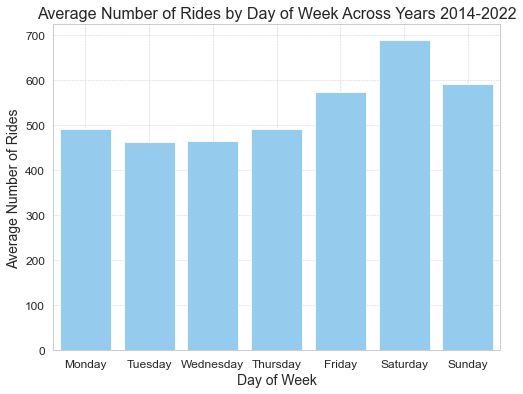

In [75]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(8,6))
ax = sns.barplot(x=overall_avg.index, y=overall_avg.values, color='lightskyblue')
ax.set_title('Average Number of Rides by Day of Week Across Years 2014-2022', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Average Number of Rides', fontsize=14)
ax.set_xticklabels(overall_avg.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)


# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Rides_per_day_per_week.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Rides_per_day_per_week.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Rides_per_day_per_week.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Rides_per_day_per_week.png")

plt.show()

### 5. Number of Rides Per Time Of The Day

In [76]:
bins = pd.cut(pd.to_datetime(cleaned_trips_df['time'], format='%H:%M:%S').dt.hour, [0, 12, 18, 24], labels=['morning', 'afternoon', 'evening'])
count_rides = cleaned_trips_df.groupby(bins).size()
count_rides

time
morning      552910
afternoon    845172
evening      343794
dtype: int64

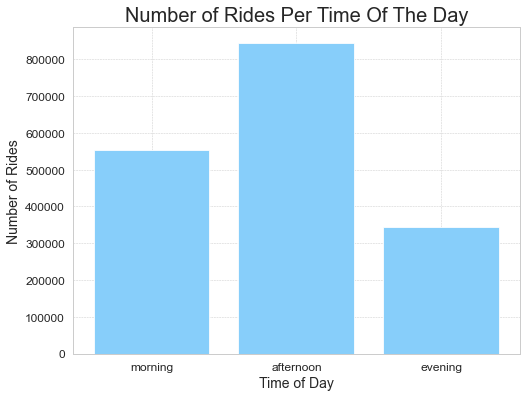

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(8,6))
plt.bar(count_rides.index, count_rides.values, color = 'lightskyblue')
plt.title('Number of Rides Per Time Of The Day', fontsize=20)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)

plt.show()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Rides_per_time_of_the_day.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Rides_per_time_of_the_day.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Rides_per_time_of_the_day.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Rides_per_time_of_the_day.png")

**Bicycle Usage Frequency Analysis - Key Takeaways:**
1. Significant spike in bike rides in 2018 and decrease in rides in 2019. The increase in rides in 2018 is due to the Univeristy of Texas' partnership with MetroBike (will be further discribed in the next part). The reason for the decrease in rides in 2019 can be the pilot study in 2019 allowing electric scooters and electric bikes on certain parkland trails. The pilot started in January 2019 and ran through September 2019.
2. Two busiest months - October and March. Two potential reasons: weather and students summer break.
3. Busiest Day - Saturday, with Friday and Sunday as the second busiest days. This trends is related to the weekend outdoor activity among working population.
4. Majority of bike rides occur in the afternoon (12pm - 5pm). 


# Bike Station Activity
1) Create a map of all the stations, active and closed, to see the location of the bike stations in Austin Texas.  
2) When were the stations closed? How many? Why? Suggestions on stations to close?  
3) Popularity of stations by year



In [78]:
# Let's merge the datasets
combined_df = cleaned_trips_df.merge(cleaned_stations_df, left_on='start_station_id', right_on='station_id')

In [79]:
# Find count of every start station for the whole dataset for every year
all_station_yr_df = cleaned_trips_df.groupby(['start_station_id', 'year']).size().reset_index().rename(columns={0:'count'})
all_station_yr_df.head(3)

start_station_id  year  count
0              1001  2017     12
1              1002  2014   1239
2              1003  2014    561

## 1. Creating a map visual for the bike station and use frequency
- Red markers for closed stations
- Green markers for active stations
- Radius of the circle around the station represents the frequency of usage

In [80]:
# Find count of every start station for the whole dataset
trips_count_df = combined_df.groupby(['start_station_id']).size().reset_index().rename(columns={0:'count'})

# Merge back with combined_df to get station information
trips_count_info_df = cleaned_stations_df.merge(trips_count_df, left_on = 'station_id', right_on='start_station_id')

In [81]:
m=folium.Map(width=1200, height=800)


title = 'Current Distribution of Bike Stations in Austin, TX'
title_html = '''<h3 style="font-size:25px"><b>{}</b></h3>
             '''.format(title)   

# add circle one by one on the map for closed stations
for i in range(0,len(trips_count_info_df)):
   folium.Circle(
      location=[trips_count_info_df.iloc[i]['lat'], trips_count_info_df.iloc[i]['lon']],
      popup=trips_count_info_df.iloc[i]['station_name'],
      radius=float(trips_count_info_df.iloc[i]['count'])*0.005,
      color='crimson' if trips_count_info_df.iloc[i]['status'] == 'closed' else 'green',
      fill=True,
      fill_color='crimson' if trips_count_info_df.iloc[i]['status'] == 'closed' else 'green',
   ).add_to(m)

# add marker one by one on the map for closed stations
for i in range(0,len(trips_count_info_df)):
    folium.Marker(location=[trips_count_info_df.iloc[i]['lat'], 
                            trips_count_info_df.iloc[i]['lon']],
                  popup=trips_count_info_df.iloc[i]['full_address'],
                  icon=folium.Icon(color='red' if trips_count_info_df.iloc[i]['status'] == 'closed' else 'green',
                                   icon_color='white', 
                                   icon='bicycle' if trips_count_info_df.iloc[i]['status'] == 'active' else 'close',
                                   prefix='fa'
                                  )
                 ).add_to(m)

# set boundaries of plot to be the min and max values of the latitude and longitude
sw = trips_count_info_df[['lat', 'lon']].min().values.tolist()
ne = trips_count_info_df[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne]) 
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; left: 10px; top: 130px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:crimson;opacity:1;'></span>Closed</li>
    <li><span style='background:#66bb6a;opacity:1;'></span>Active</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)
m.get_root().html.add_child(folium.Element(title_html))


# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     m.save(parent_folder + "\\Figures\\bike_station_popularity.html")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     m.save(parent_folder + "\\Figures\\bike_station_popularity.html")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    m.save(parent_folder + "/Figures/bike_station_popularity.html")
else:
    os.mkdir(parent_folder + "/Figures")
    m.save(parent_folder + "/Figures/bike_station_popularity.html")
# Show the map again
m

From the map above the popular locations are at:  
1) Near univeristy campus, buildings and accomodation  
2) Downtown  
3) Near schools  
4) Along Hike and Bike trails   
5) Along railway stations

## 2. Exploring Closed Stations

### 2.1 When were the stations closed?
- Track the activity of the closed stations to find out in which year the stations were closed.  
- From the trips at the station, find out the years which the first and last trips were made at the station, i.e when station was opened and closed.    
- Count the number of trips made in the year the station was closed.  

This would be a good indication of why the station was closed, eg. not popular enough.

In [82]:
# Get the stations that are now closed
closed_stations_df = combined_df[combined_df['status']=='closed']

In [83]:
# Get the minimum and maximum year the station was used
closed_min_year_df= closed_stations_df.groupby(['station_id','station_name','full_address','lat','lon'])[['year']].min().rename(columns={'year':'min_year'}).reset_index()
closed_max_year_df = closed_stations_df.groupby(['station_id','station_name','full_address','lat','lon'])[['year']].max().rename(columns={'year':'max_year'}).reset_index()

# Merge min and max df
station_min_max_yr_df = closed_min_year_df.merge(closed_max_year_df[['station_id', 'max_year']], on='station_id')

# Merge with trips_per_yr_df to get the number of trips made in max_year 
station_min_max_yr_df = station_min_max_yr_df.merge(all_station_yr_df, left_on  = ['station_id', 'max_year'], right_on = ['start_station_id', 'year'])
station_min_max_yr_df = station_min_max_yr_df.drop(columns = ['start_station_id', 'year']) # drop unneccessary columns
station_min_max_yr_df = station_min_max_yr_df.rename(columns={'count':'max_year_trips'}) # rename columns

In [84]:
# Dataframe of the total number of bike trips made every year
trips_per_yr_df = cleaned_trips_df.groupby('year')[['trip_id']].count().reset_index().rename(columns={'trip_id':'total_annual_trips'})

In [85]:
# Merge station_min_max_yr_df with annual trips dataframe so we can compare no. of trips made at the station vs total trips the year it closed
station_min_max_yr_df = station_min_max_yr_df.merge(trips_per_yr_df, left_on  = ['max_year'], right_on = 'year')

In [86]:
# Find percentage of the trips at the station as an overall of the trips that year
station_min_max_yr_df['perc_of_annual'] = station_min_max_yr_df['max_year_trips']/ station_min_max_yr_df['total_annual_trips'] *100
station_min_max_yr_df.head()

station_id                     station_name  \
0        1001          OFFICE/Main/Shop/Repair   
1        1007                     Lavaca & 6th   
2        2538  Bullock Museum @ Congress & MLK   
3        2541  State Capitol @ 14th & Colorado   
4        2564                 5th & San Marcos   

                              full_address        lat        lon  min_year  \
0     1000 Brazos St, Austin, Texas, 78701  30.271722 -97.740192      2017   
1      601 Lavaca St, Austin, Texas, 78701  30.268748 -97.745127      2015   
2  1881 Congress Ave, Austin, Texas, 78701  30.280524 -97.738097      2014   
3      206 W 14th St, Austin, Texas, 78701  30.276798 -97.741693      2014   
4       991 E 5th St, Austin, Texas, 78702  30.263829 -97.732003      2014   

   max_year  max_year_trips  year  total_annual_trips  perc_of_annual  
0      2017              12  2017              192716        0.006227  
1      2017            1477  2017              192716        0.766413  
2      2017            2574  2017              192716        1.335644  
3      2017            1017  2017              192716        0.527720  
4      2017             519  2017              192716        0.269308

The dataframe **station_min_max_yr_df** shows us information on all the closed stations.  
The min_year is the year the station was opened, and the max_year is the year the station was closed.  
We found the number of trips made at the station in the year it was cloased.  
We also found the number of trips made annually across all stations.  
This way we can calculate the percentage of the trips at the closed stations, compared to the total number of trips made that year.  

### 2.2 How many stations were closed every year?
- Find number of stations closed each year.  
- Compare this to the number of existing stations each year.  

In [87]:
# Find number of stations closed every year
closed_by_year_df = station_min_max_yr_df.groupby(['max_year']).size().reset_index().rename(columns={0:'closed'})
closed_by_year_df.head(2)

max_year  closed
0      2014       3
1      2016       9

In [88]:
# create a pivot table to find the number of trips at all stations across all year
stations_actvity_df = combined_df.pivot_table('trip_id', index=['start_station_id','status'], columns='year',aggfunc= 'count')
stations_actvity_df = stations_actvity_df.reset_index()
stations_actvity_df.sample(5)

year  start_station_id  status    2014    2015    2016    2017     2018  \
80                3838  active     NaN     NaN     NaN     NaN  15789.0   
24                2542  active  1884.0  2342.0  3136.0  4209.0   2874.0   
32                2552  active  2194.0  4221.0  6016.0  5603.0   4861.0   
21                2539  active   309.0  4194.0  5247.0  4873.0   3530.0   
40                2568  active   127.0  1401.0  1769.0  1353.0    939.0   

year    2019    2020    2021     2022  
80    2780.0  1738.0  6604.0  14363.0  
24    1044.0  1225.0  2110.0   4287.0  
32    2338.0  2802.0  4923.0   4903.0  
21    1201.0  1951.0  3469.0   3200.0  
40     372.0   278.0   702.0    742.0

In [89]:
# Create dictionary to store years, and number of bike stations
station_count = [stations_actvity_df[i].count() for i in range(2014,2023)]
station_dict = {'year': np.arange(2014,2023),
               'num_bike_stns': station_count}

stations_years_df = pd.DataFrame(station_dict)

In [90]:
# Merge the two dataframes
stations_qty_df = stations_years_df.merge(closed_by_year_df, left_on ='year', right_on ='max_year', how='left')
stations_qty_df['closed'] = stations_qty_df['closed'].fillna(0)

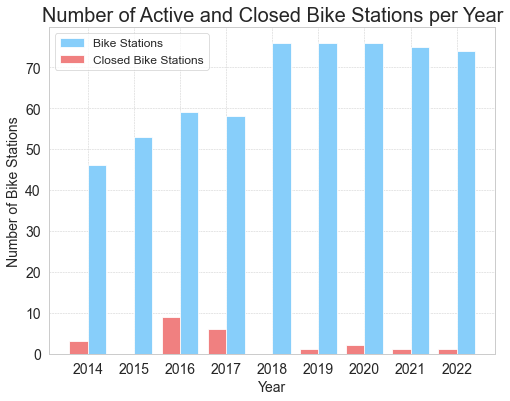

<Figure size 432x288 with 0 Axes>

In [91]:
# plot graph of bike stations and closed bike stations every year
x = stations_qty_df['year']
yactive = stations_qty_df['num_bike_stns']
yclosed = stations_qty_df['closed']

plt.figure(figsize=(8,6))
plt.bar(x, yactive, 0.4, label = 'Bike Stations', align='edge', color = 'lightskyblue')
plt.bar(x, yclosed, -0.4, label = 'Closed Bike Stations', align='edge', color = 'lightcoral')

plt.xticks(x, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Bike Stations', fontsize=14)
plt.title('Number of Active and Closed Bike Stations per Year', fontsize=20)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)

plt.show()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Open_close_bikestation_per_year.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Open_close_bikestation_per_year.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Open_close_bikestation_per_year.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Open_close_bikestation_per_year.png")

The MetroBike bike-share system was enrolled into Austin in December 2013.  
We see a significant increase from 2013 to 2014 as bike stations were being rolled out into the city.  

From 2015-2017, we can see that the new bike stations were opened, and exisiting bike stations were closed depending on the usage frequency.  
This is probably becuase the bike-share progamme is still relatively new, so data is constantly being monitored to figure out the most optimum distribution and locations of bike stations.  

In 2018, there is a large increase in the bike stations. This is due to the Univeristy of Texas' partnership with MetroBike, offering free membeship to its students.  
9 out of 18 of the new stations were located across the University campus.  
This has resulted in the annual trips in 2018 almost doubling that of 2017, showing huge success of the bike-share programme.

In 2019-2020, we see that no new bike stations were added, and in fact a few bike stations were closed.  
The number of annual trips has dropped significantly, lower than all the previous years.  
This can be attributed to various reasons such as the University ending free student membership, the pandemic etc.  

From 2021 onwards, number of bike stations remained roughly the same, showing regular ridership. 





### 2.3 Possible reasons for station closure?

In [92]:
# Using dataframe station_min_max_yr_df and select column perc_of_annual which shows the number of rides as a % of the annual rides
station_min_max_yr_df['perc_of_annual'].describe()

count    23.000000
mean      0.490754
std       0.440010
min       0.006227
25%       0.179355
50%       0.419879
75%       0.702181
max       1.744955
Name: perc_of_annual, dtype: float64

From the data and the map visual created, we can see that the station are closed because of serveral reasons:  
- Too close to an exisiting station that is more popular
- Not being used enough. The mean number of rides per station was only 0.49% of the annual rides. This percentage usage is insignificant and therefore was closed.  
 
We also observe that there is a high number of bike station closures in the Uptown/ North District compared to other districts.  
Based on background research, the Uptown/ North District is mostly occupied by government organizations, law firms, NGOs, regulatory offices and parking garages.  
This is because of its proximity to the Capitol.  

This implies biking to work is still a barrier to people in Austin.
There could be many reasons why people do not commute to work by bicycle, for example:  
1) People might live too far, making it impractical for them to cycle  
2) Concerns about road safety  
3) Difficulty in navigation as they are unfamiliar with the roads  
4) Weather - less appealing to cycle when weather conditions are poor  


### 2.4 Suggestions on station closures

In [93]:
# find the percentage of activity of each station vs total number of trips in 2022
stations_actvity_df['2022_perc_of_annual'] = round(stations_actvity_df[2022]/(stations_actvity_df[2022].sum())*100,2)

In [94]:
# find 5 least used bike stations in trips 2022 
stations_actvity_df.sort_values(by='2022_perc_of_annual').head()

year  start_station_id  status  2014  2015  2016  2017     2018    2019  \
87                4054  active   NaN   NaN   NaN   NaN    121.0   208.0   
73                3792  active   NaN   NaN   NaN   NaN  20118.0  3676.0   
86                4052  active   NaN   NaN   NaN   NaN    108.0   224.0   
85                4051  active   NaN   NaN   NaN   NaN    175.0   318.0   
88                4055  active   NaN   NaN   NaN   NaN    733.0   776.0   

year    2020    2021   2022  2022_perc_of_annual  
87     285.0   428.0  473.0                 0.19  
73    1564.0  7404.0  565.0                 0.23  
86     290.0   492.0  609.0                 0.25  
85     171.0   542.0  621.0                 0.25  
88     277.0   382.0  606.0                 0.25

We can see that the 5 least popular stations in year 2022 had a maximum annual percentage usage of 0.25%.  
We suggest that Metro Bike should look into these particular stations and whether operation should continue or not.   

In [95]:
# Select stations with less or equal to 0.25% of the annual rides
maybe_close_df = stations_actvity_df[stations_actvity_df['2022_perc_of_annual']<=0.25]

In [96]:
maybe_close_stn_list = maybe_close_df['start_station_id'].tolist()

In [97]:
# Create foilum map
m=folium.Map(width=1200, height=800)


title = 'Distribution of Bike Stations in Austin, TX'
title_html = '''<h3 style="font-size:25px"><b>{}</b></h3>
             '''.format(title)   

# add circle one by one on the map for closed stations
for i in range(0,len(trips_count_info_df)):
   folium.Circle(
      location=[trips_count_info_df.iloc[i]['lat'], trips_count_info_df.iloc[i]['lon']],
      popup=trips_count_info_df.iloc[i]['station_name'],
      radius=float(trips_count_info_df.iloc[i]['count'])*0.005,
      color='crimson' if trips_count_info_df.iloc[i]['status'] == 'closed' else 'blue' if trips_count_info_df.iloc[i]['start_station_id'] in maybe_close_stn_list else 'green',
      fill=True,
      fill_color='crimson' if trips_count_info_df.iloc[i]['status'] == 'closed' else 'blue' if trips_count_info_df.iloc[i]['start_station_id'] in maybe_close_stn_list else 'green',
   ).add_to(m)

# add marker one by one on the map for closed stations
for i in range(0,len(trips_count_info_df)):
    folium.Marker(location=[trips_count_info_df.iloc[i]['lat'], 
                            trips_count_info_df.iloc[i]['lon']],
                  popup=trips_count_info_df.iloc[i]['full_address'],
                  icon=folium.Icon(color='red' if trips_count_info_df.iloc[i]['status'] == 'closed' else 'blue' if trips_count_info_df.iloc[i]['start_station_id'] in maybe_close_stn_list else 'green',
                                   icon_color='white', 
                                   icon='question-circle' if trips_count_info_df.iloc[i]['start_station_id'] in maybe_close_stn_list else 'bicycle' if trips_count_info_df.iloc[i]['status'] == 'active' else 'close',
                                   prefix='fa'
                                  )
                 ).add_to(m)

# set boundaries of plot to be the min and max values of the latitude and longitude
sw = trips_count_info_df[['lat', 'lon']].min().values.tolist()
ne = trips_count_info_df[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne]) 

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:20px; left: 10px; top: 130px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:crimson;opacity:1;'></span>Closed</li>
    <li><span style='background:#66bb6a;opacity:1;'></span>Active</li>
    <li><span style='background:#00b0ff;opacity:1;'></span>Suggested Closure</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 100%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)
m.get_root().html.add_child(folium.Element(title_html))


# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     m.save(parent_folder + "\\Figures\\Bike_station_popularity_suggestion.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     m.save(parent_folder + "\\Figures\\Bike_station_popularity_suggestion.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    m.save(parent_folder + "/Figures/Bike_station_popularity_suggestion.png")
else:
    os.mkdir(parent_folder + "/Figures")
    m.save(parent_folder + "/Figures/Bike_station_popularity_suggestion.png")

# Show the map again
m

We suggest that Metro Bike look into the operation of the stations with less than 0.25% usage in 2022.  
These stations are all located away from popular areas such as the university, downtown, parks or the cycle trails.  

Perhaps the funding used to operate these less popular stations, can be spent on the following:  
1) Bike and dock maintanance   
2) Purchasing more electric bikes to allow more efficient and comfortable commutes  
3) Improving services by reaching communities outside of the downtown area


## 3. Popularity of bike stations by year

In [98]:
# Merge with all_station_yr_df with cleaned_stations_df on the station_id to obtain station information
pop_stations_merged_df = all_station_yr_df.merge(cleaned_stations_df, left_on='start_station_id', right_on='station_id')

# Rank frequency of each station for each year
pop_stations_merged_df['ranking'] = pop_stations_merged_df.groupby(['year'])['count'].rank(ascending=False)

# Keep only the top 5 stations
top_five_df = pop_stations_merged_df.query('ranking <= 5')

top_five_df = top_five_df.pivot_table('station_name', index='ranking', columns='year',aggfunc=lambda x: ' '.join(str(v) for v in x))
top_five_df = top_five_df.rename_axis(None, axis=1).reset_index()

display(top_five_df)

ranking                      2014                      2015  \
0      1.0  City Hall / Lavaca & 2nd            2nd & Congress   
1      2.0                4th/Sabine               5th & Bowie   
2      3.0               5th & Bowie  City Hall / Lavaca & 2nd   
3      4.0            4th & Congress            4th & Congress   
4      5.0      Riverside @ S. Lamar      Riverside @ S. Lamar   

                       2016                      2017                    2018  \
0      Riverside @ S. Lamar      Rainey St @ Cummings    21st & Speedway @PCL   
1      Rainey St @ Cummings      Riverside @ S. Lamar       23rd & Rio Grande   
2  City Hall / Lavaca & 2nd            2nd & Congress  Dean Keeton & Speedway   
3            2nd & Congress           Rainey/Driskill            22nd & Pearl   
4               5th & Bowie  City Hall / Lavaca & 2nd       Rio Grande & 28th   

                     2019                           2020  \
0    21st & Speedway @PCL           Riverside @ S. Lamar   
1  Dean Keeton & Speedway           Rainey St @ Cummings   
2       Rio Grande & 28th      Lakeshore @ Austin Hostel   
3    Riverside @ S. Lamar                    Zilker Park   
4            22nd & Pearl  Pfluger Bridge @ W 2nd Street   

                       2021                  2022  
0      21st & Speedway @PCL  21st & Speedway @PCL  
1         Rio Grande & 28th            4th/Sabine  
2      Dean Keeton & Whitis         Nueces & 26th  
3              22nd & Pearl  Dean Keeton & Whitis  
4  UT West Mall @ Guadalupe      Guadalupe & 21st

Patterns observed:
- In 2014 - 2017, the top 5 stations were all along the following locations:
   - Downtown District (Central)
   - Downtown (Outskirts)
   - Downtown along the Colorado River  


- In 2018-2019: the top 5 stations were all dotted around the campus of University of Texas(UT).  
    This was because in 2018, UT had launched its partnership with Metro bikes.   
    Students could enjoy free annual membership and faculty and staff can register at a reduced rate.  
    This boosted the use of bike sharing greatly.  
    ref: https://sustainability.utexas.edu/news/bike-sharing-launched-ut-austin


- In 2020, we observe that the most popular stations have moved away the University site.  
    Due to the pandemic, students received their education online and there was no need to be on campus.  
    Instead, we see that the more popular stations were ones along the river, near parks and further away from the city center in general.  



 - From 2021 to 2022(to date), as students gradually returned to University, the bike stations on campus regained its popularity.  
    It is unsuprising that the bike stations at the University campus were the most popular as students and staff enjoy an 85% discount on the metro bike annual memberships.  
    This means that travelling using the bikes would bring substantial financial savings.  
    ref: https://parking.utexas.edu/bcycle
    
 
    


## 4. Popularity of subscription by year

In [75]:
# Group the dataset by subscriber_type and year
pop_subscriber_type = cleaned_trips_df.groupby(['subscriber_type', 'year']).size().reset_index().rename(columns={0:'count'})

# Rank frequency of each subscriber type by year
pop_subscriber_type['ranking'] = pop_subscriber_type.groupby(['year'])['count'].rank(ascending=False)

# Keep only the top 5 subscriber types
top_five_substriber_type = pop_subscriber_type.query('ranking <= 5')

# Create a pivot table with top 5 subscriber type per year
top_five_substriber_type_ranking = top_five_substriber_type.pivot_table('subscriber_type', index='ranking', columns='year', aggfunc=lambda x: ' '.join(str(v) for v in x))
top_five_substriber_type_ranking = top_five_substriber_type_ranking.rename_axis(None, axis=1).reset_index()

display(top_five_substriber_type_ranking)

ranking                2014       2015       2016       2017   
0      1.0               Daily      Daily      Daily      Daily  \
1      2.0              Annual     Annual     Annual     Annual   
2      3.0     Founding Member    Monthly    Monthly  Weekender   
3      4.0  Student Membership  Weekender  Weekender    Monthly   
4      5.0              Weekly     Weekly   Explorer   Explorer   

                 2018                2019         2020                2021   
0  Student Membership  Student Membership       Annual  Student Membership  \
1               Daily              Annual  Single Ride              Annual   
2              Annual         Single Ride        Daily             Monthly   
3           Weekender               Daily      Monthly         Single Ride   
4             Monthly            Explorer     Explorer               Daily   

                 2022  
0  Student Membership  
1             Monthly  
2              Annual  
3            Explorer  
4         Single Ride

In [76]:
# Sort ranking of 5 subscriptions by year 
top_five_substriber_type.sort_values(by='year', inplace=True)

# Visualize top 5 subscriptions by year
list_subs = list(set(top_five_substriber_type['subscriber_type']))
pal = list(sns.color_palette(palette='coolwarm',
                             n_colors=len(list_subs)).as_hex())
dict_color = dict(zip(list_subs, pal))

fig = px.bar(top_five_substriber_type, x='subscriber_type', y='count',
             color='subscriber_type', text='ranking',
             color_discrete_map= dict_color,
             animation_frame='year',
             animation_group='subscriber_type',
             range_y=[0,237000],
             labels={'count': 'Number of subscriptions used',
                     'subscriber_type': 'Subscription types'}
            )
fig.update_layout(width=800, height=600, showlegend=True,
                  xaxis=dict(range=[0, len(list_subs)], autorange=True, tickmode = 'array', dtick = 1),
                  yaxis=dict(range=[0, 237000], autorange=True),
                  title_text='Top 5 subscription types by year',
                  title_font_size=20,
                  title_font_color='black',
                  title_x=0.4,
                  font_color='black',
                  font_size=14,
                  autosize=True,
                  plot_bgcolor='rgba(0,0,0,0)'
                  )
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_traces(textfont_size=16, textangle=0)
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='black', gridcolor='Grey')
fig.update_yaxes(showline=True, linewidth=0.5, linecolor='black', gridcolor='Grey')

# Save files on Windows 
# if os.path.exists(parent_folder + "\\Figures"):
#     fig.write_image(parent_folder + "\\Figures\\Rides_per_month_by_year.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     fig.write_image(parent_folder + "\\Figures\\Rides_per_month_by_year.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    fig.write_image(parent_folder + "/Figures/Rides_per_month_by_year.png")
else:
    os.mkdir(parent_folder + "/Figures")
    fig.write_image(parent_folder + "/Figures/Rides_per_month_by_year.png")


fig.show()

Patterns observed: <br>
1. "Daily" subscription was the most popular type between 2014 and 2016
2. After UT launched its partnership with Metro Bikes in 2018 the number of "Student Membership" sharply increased and remained the most popular subscription type between 2018 and 2019, 2021 and 2022.
3. The number of all subscriptions dramatically decreased in 2020 because of Covid-19. The most popular subscription type was "Annual" subscription.

## 5. Rides in context of the weather conditions analysis 

In [101]:
cleaned_weather_df.head()

name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Austin texas  2014-01-01     19.1      3.4  10.4          19.1   
1  Austin texas  2014-01-02     11.7      1.7   6.5          11.7   
2  Austin texas  2014-01-03     13.1     -2.8   4.9          13.1   
3  Austin texas  2014-01-04     21.5      5.3  13.4          21.5   
4  Austin texas  2014-01-05     14.8      1.9   8.1          14.8   

   feelslikemin  feelslike  dew  humidity  ...  solarradiation  solarenergy  \
0           2.4       10.2  4.3      67.0  ...             0.0          0.0   
1          -2.2        4.4 -3.6      50.6  ...             0.0          0.0   
2          -2.8        4.2 -5.8      51.0  ...             0.0          0.0   
3           3.2       12.9  7.9      71.4  ...             0.0          0.0   
4          -2.1        5.2 -1.1      55.2  ...             0.0          0.0   

   uvindex              sunrise               sunset  moonphase  \
0      0.0  2014-01-01T07:27:38  2014-01-01T17:41:46       0.00   
1      0.0  2014-01-02T07:27:51  2014-01-02T17:42:29       0.04   
2      0.0  2014-01-03T07:28:03  2014-01-03T17:43:13       0.08   
3      0.0  2014-01-04T07:28:12  2014-01-04T17:43:58       0.11   
4      0.0  2014-01-05T07:28:21  2014-01-05T17:44:44       0.15   

         conditions                           description               icon  \
0  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day   
1             Clear  Clear conditions throughout the day.          clear-day   
2             Clear  Clear conditions throughout the day.          clear-day   
3  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day   
4  Partially cloudy            Clearing in the afternoon.  partly-cloudy-day   

                                            stations  
0  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
1  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
2  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
3  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  
4  KATT,KAUS,72064800230,KEDC,72254013904,7225441...  

[5 rows x 31 columns]

In [102]:
# Find the repeated trip_id values
repeated_trip_ids = cleaned_trips_df[cleaned_trips_df.duplicated('trip_id', keep=False)]['trip_id']

# Calculate statistics
num_repeated_trip_ids = len(repeated_trip_ids)
num_unique_repeated_trip_ids = repeated_trip_ids.nunique()
repeated_trip_id_counts = repeated_trip_ids.value_counts()

# Print statistics
print("Statistics of Repeated trip_ids:")
print("-------------------------------")
print(f"Total Repeated trip_ids: {num_repeated_trip_ids}")
print(f"Unique Repeated trip_ids: {num_unique_repeated_trip_ids}")
print("\nRepeated trip_id Counts:")
print(repeated_trip_id_counts)

Statistics of Repeated trip_ids:
-------------------------------
Total Repeated trip_ids: 0
Unique Repeated trip_ids: 0

Repeated trip_id Counts:
Series([], Name: trip_id, dtype: int64)


In [103]:
trip_counts = cleaned_trips_df[['trip_id', 'year', 'month']].groupby(['year', 'month']).count()
trip_counts = trip_counts.sort_values(by=['year', 'month'])

trip_counts.to_csv('../Data/trip_counts.csv')
trip_counts

trip_id
year month         
2014 Apr      12624
     Aug       9415
     Dec       6426
     Feb       5297
     Jan       3358
...             ...
2022 Mar      22904
     May      20373
     Nov      22328
     Oct      31683
     Sep      29140

[108 rows x 1 columns]

In [104]:
# Generation of sorting by day for the correlation purposes with e.g. weather
# It takes a few minutes to calculate

# Convert the 'start_time' column to datetime format
cleaned_trips_df['start_time'] = pd.to_datetime(cleaned_trips_df['start_time'])

# Extract the day of the year from the 'start_time' column
cleaned_trips_df['day_of_year'] = cleaned_trips_df['start_time'].dt.dayofyear

# Group the data by year and day_of_year
trip_counts_per_day = cleaned_trips_df[['trip_id', 'year', 'day_of_year']].groupby(['year', 'day_of_year']).count()

# Sort the DataFrame by year and day_of_year
trip_counts_per_day = trip_counts_per_day.sort_values(by=['year', 'day_of_year'])

# Save the DataFrame to a CSV file
trip_counts_per_day.to_csv('../Data/trip_counts_per_day.csv')

trip_counts_per_day

trip_id
year day_of_year         
2014 1                267
     2                143
     3                 63
     4                173
     5                 44
...                   ...
2022 361              207
     362              377
     363              367
     364              336
     365              528

[3284 rows x 1 columns]

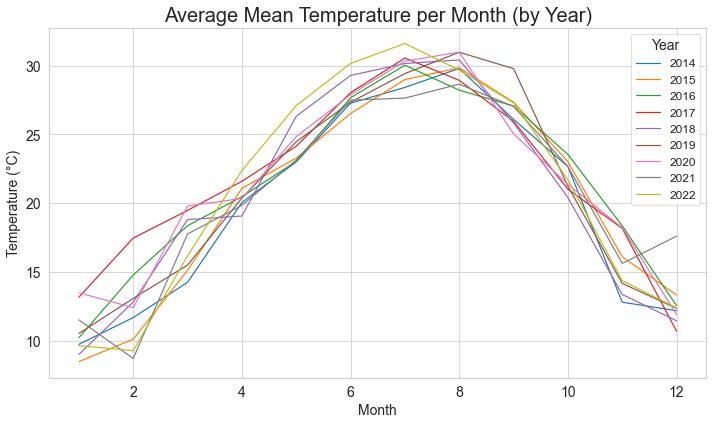

In [105]:
# Convert the 'datetime' column to datetime format
cleaned_weather_df['datetime'] = pd.to_datetime(cleaned_weather_df['datetime'])

# Extract year and month from the datetime column
cleaned_weather_df['year'] = cleaned_weather_df['datetime'].dt.year
cleaned_weather_df['month'] = cleaned_weather_df['datetime'].dt.month

# Calculate the average mean temperature for each year and month
monthly_avg_mean_temps = cleaned_weather_df.groupby(['year', 'month'])['temp'].mean()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each year and plot the average mean temperature per month
for year in cleaned_weather_df['year'].unique():
    year_temps = monthly_avg_mean_temps.loc[year]
    ax.plot(year_temps.index, year_temps.values, label=str(year))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']

ax.set_xlabel('Month', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_ylabel('Temperature (°C)',fontsize=14)
ax.set_title('Average Mean Temperature per Month (by Year)', fontsize=20)
ax.legend(title='Year', fontsize=12, title_fontsize=14)

plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Mean_temperatures.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Mean_temperatures.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Mean_temperatures.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Mean_temperatures.png")

plt.show()

In [106]:
# Print the column names
column_names_weather = cleaned_weather_df.columns.tolist()
print(column_names_weather)

['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations', 'year', 'month']


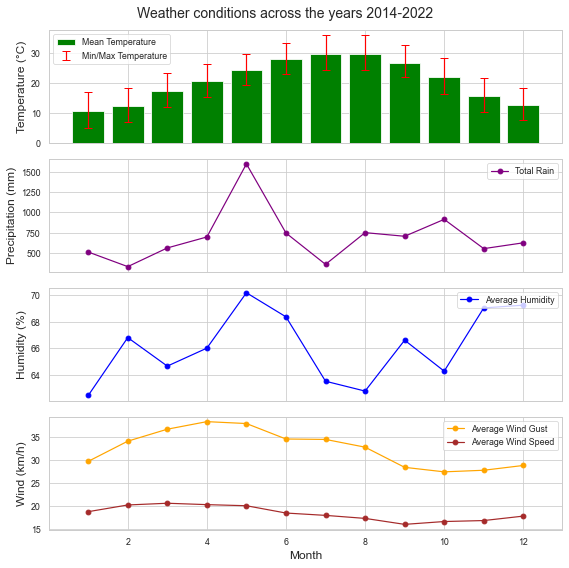

In [107]:
# Convert the 'datetime' column to datetime format
cleaned_weather_df['datetime'] = pd.to_datetime(cleaned_weather_df['datetime'])

# Extract month from the datetime column
cleaned_weather_df['month'] = cleaned_weather_df['datetime'].dt.month

# Calculate the average mean, min, and max temperatures for each month
monthly_avg_mean_temps = cleaned_weather_df.groupby('month')['temp'].mean()
monthly_avg_min_temps = cleaned_weather_df.groupby('month')['tempmin'].mean()
monthly_avg_max_temps = cleaned_weather_df.groupby('month')['tempmax'].mean()

# Calculate the total rain for each month
monthly_total_rain = cleaned_weather_df.groupby('month')['precip'].sum()

# Calculate the average humidity, wind gust, wind speed, and solar radiation for each month
monthly_avg_humidity = cleaned_weather_df.groupby('month')['humidity'].mean()
monthly_avg_windgust = cleaned_weather_df.groupby('month')['windgust'].mean()
monthly_avg_windspeed = cleaned_weather_df.groupby('month')['windspeed'].mean()

# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

# Add title
fig.suptitle("Weather conditions across the years 2014-2022", fontsize=14)

# Plot temperature
axs[0].bar(monthly_avg_mean_temps.index, monthly_avg_mean_temps.values, color='green', label='Mean Temperature')
axs[0].errorbar(monthly_avg_mean_temps.index, monthly_avg_mean_temps.values,
             yerr=[monthly_avg_mean_temps - monthly_avg_min_temps, monthly_avg_max_temps - monthly_avg_mean_temps],
             fmt='none', ecolor='red', capsize=4, label='Min/Max Temperature')
axs[0].set_ylabel('Temperature (°C)', fontsize=12)
axs[0].legend(loc='upper left')

# Plot rain
axs[1].plot(monthly_total_rain.index, monthly_total_rain.values, color='purple', marker='o', linestyle='-', label='Total Rain')
axs[1].set_ylabel('Precipitation (mm)', fontsize=12)
axs[1].legend(loc='upper right')

# Plot humidity
axs[2].plot(monthly_avg_humidity.index, monthly_avg_humidity.values, color='blue', marker='o', linestyle='-', label='Average Humidity')
axs[2].set_ylabel('Humidity (%)', fontsize=12)
axs[2].legend(loc='upper right')

# Plot wind gust and wind speed
axs[3].plot(monthly_avg_windgust.index, monthly_avg_windgust.values, color='orange', marker='o', linestyle='-', label='Average Wind Gust')
axs[3].plot(monthly_avg_windspeed.index, monthly_avg_windspeed.values, color='brown', marker='o', linestyle='-', label='Average Wind Speed')
axs[3].set_xlabel('Month', fontsize=12)
axs[3].set_ylabel('Wind (km/h)', fontsize=12)
axs[3].legend(loc='upper right')

# Adjust the layout and spacing
plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Weather_conditions.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Weather_conditions.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Weather_conditions.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Weather_conditions.png")

# Display the plot
plt.show()


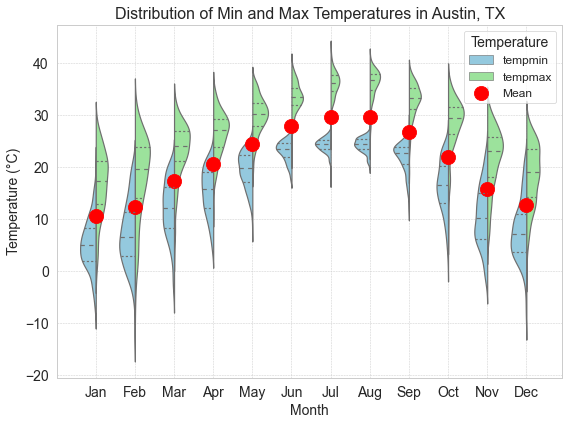

In [108]:
# Convert the 'datetime' column to datetime format
cleaned_weather_df['datetime'] = pd.to_datetime(cleaned_weather_df['datetime'])

# Extract month from the datetime column
cleaned_weather_df['month'] = cleaned_weather_df['datetime'].dt.month

# Create a new DataFrame for min and max temperatures
df_min_max = cleaned_weather_df[['month', 'tempmin', 'tempmax']].copy()

# Calculate the average mean temperatures for each month
monthly_avg_mean_temps = cleaned_weather_df.groupby('month')['temp'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Specify the order of the months
month_order = range(1, 13)

# Use seaborn to plot the violin representation of min and max temperatures
sns.violinplot(x='month', y='value', hue='variable', data=pd.melt(df_min_max, ['month']),
               inner='quartile', palette=['skyblue', 'lightgreen'], split=True, ax=ax, order=month_order)

# Plot the average mean temperatures as large spheres
ax.scatter(monthly_avg_mean_temps['month'] - 1, monthly_avg_mean_temps['temp'], color='red', s=200, label='Mean')
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Customize the plot
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)
ax.set_title('Distribution of Min and Max Temperatures in Austin, TX',fontsize=16)
ax.legend(title='Temperature', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Temperatures_distributions.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Temperatures_distributions.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Temperatures_distributions.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Temperatures_distributions.png")

plt.show()

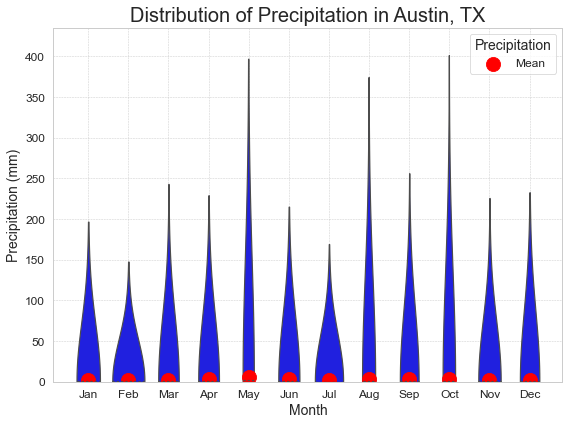

In [109]:
# Convert the 'datetime' column to datetime format
cleaned_weather_df['datetime'] = pd.to_datetime(cleaned_weather_df['datetime'])

# Extract month from the datetime column
cleaned_weather_df['month'] = cleaned_weather_df['datetime'].dt.month

# Filter out negative precipitation values
df_precip = cleaned_weather_df.loc[cleaned_weather_df['precip'] >= 0, ['month', 'precip']].copy()

# Calculate the average mean precipitation for each month
monthly_avg_mean_precip = df_precip.groupby('month')['precip'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Specify the order of the months
month_order = range(1, 13)

# Use seaborn to plot the violin representation of precipitation with adjusted bandwidth and badge color
sns.violinplot(x='month', y='precip', data=df_precip,
               inner='quartile', color='b', split=False, ax=ax, order=month_order, bw=10.0)

# Plot the average mean precipitation as large spheres
ax.scatter(monthly_avg_mean_precip['month'] - 1, monthly_avg_mean_precip['precip'], color='red', s=200, label='Mean')

# Customize the plot
ax.set_xticks(range(12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Precipitation (mm)',fontsize=14)
ax.set_title('Distribution of Precipitation in Austin, TX',fontsize=20)
ax.legend(title='Precipitation',fontsize=12, title_fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)

plt.ylim(bottom=0)  # Ensure y-axis starts from 0

plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Precipitation_distributions.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Precipitation_distributions.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Precipitation_distributions.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Precipitation_distributions.png")

plt.show()

In [110]:
# it needs to be before all code with weather
monthly_avg_mean_temps = cleaned_weather_df.groupby(['year', 'month'])['temp'].mean()
monthly_avg_mean_temps
monthly_avg_mean_precip = cleaned_weather_df.groupby(['year', 'month'])['precip'].mean()
monthly_avg_mean_precip


grouped_month_year = cleaned_trips_df.groupby(['month', 'year'])
rides_per_month_per_year = grouped_month_year.size().reset_index(name='num_rides')

rides_per_month_per_year = rides_per_month_per_year[(rides_per_month_per_year['year'] != 2013) & (rides_per_month_per_year['year'] != 2023)]

cats = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

rides_per_month_per_year

month  year  num_rides
0     Apr  2014      12624
1     Apr  2015      15138
2     Apr  2016      13825
3     Apr  2017      22404
4     Apr  2018      64612
..    ...   ...        ...
103   Sep  2018      37295
104   Sep  2019       8611
105   Sep  2020      11304
106   Sep  2021      27883
107   Sep  2022      29140

[108 rows x 3 columns]

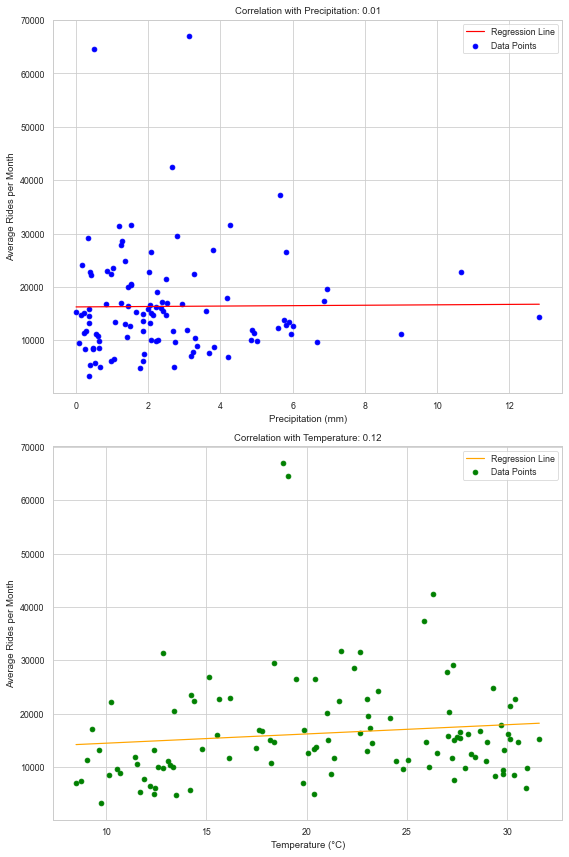

In [111]:
# Correlation plots for all years together

# Reset the index for monthly_avg_mean_temps and monthly_avg_mean_precip
monthly_avg_mean_temps = monthly_avg_mean_temps.reset_index()
monthly_avg_mean_precip = monthly_avg_mean_precip.reset_index()

# Rename the month names in 'rides_per_month_per_year' to their corresponding numeric values for compatibility with other dataframes
months_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
rides_per_month_per_year['month'] = rides_per_month_per_year['month'].map(months_dict)

# Merge the three dataframes
merged_df = pd.merge(monthly_avg_mean_temps, monthly_avg_mean_precip, on=['year', 'month'])
merged_df = pd.merge(merged_df, rides_per_month_per_year, on=['year', 'month'])

# Calculate the correlation between precipitation and average rides per month
corr_precip, _ = pearsonr(merged_df["precip"], merged_df["num_rides"])

# Calculate the correlation between temperature and average rides per month
corr_temp, _ = pearsonr(merged_df["temp"], merged_df["num_rides"])

# Set up the plot
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot the correlation between precipitation and average rides per month
axs[0].scatter(merged_df["precip"], merged_df["num_rides"], color='blue', label='Data Points')
slope_precip, intercept_precip = np.polyfit(merged_df["precip"], merged_df["num_rides"], 1)
x_precip = np.array([min(merged_df["precip"]), max(merged_df["precip"])])
y_precip = slope_precip * x_precip + intercept_precip
axs[0].plot(x_precip, y_precip, color='red', label='Regression Line')
axs[0].set_xlabel('Precipitation (mm)')
axs[0].set_ylabel('Average Rides per Month')
axs[0].set_title(f'Correlation with Precipitation: {corr_precip:.2f}')
axs[0].legend()

# Plot the correlation between temperature and average rides per month
axs[1].scatter(merged_df["temp"], merged_df["num_rides"], color='green', label='Data Points')
slope_temp, intercept_temp = np.polyfit(merged_df["temp"], merged_df["num_rides"], 1)
x_temp = np.array([min(merged_df["temp"]), max(merged_df["temp"])])
y_temp = slope_temp * x_temp + intercept_temp
axs[1].plot(x_temp, y_temp, color='orange', label='Regression Line')
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_ylabel('Average Rides per Month')
axs[1].set_title(f'Correlation with Temperature: {corr_temp:.2f}')
axs[1].legend()

plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Precip_and_temp_correlation_all_years.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Precip_and_temp_correlation_all_years.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Precip_and_temp_correlation_all_years.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Precip_and_temp_correlation_all_years.png")

plt.show()


In [112]:
# The following code is based on the logistic assumption that people are more inclined to ride bicycles within an optimal temperature range. 
# The objective is to identify the optimal temperature at which the number of bike trips is expected to be highest. 
# To achieve this, a grid search of temperatures is performed to calculate the correlation between the absolute difference from the optimal temperature 
# and the number of bike trips. The temperature with the most negative correlation (the strongest relationship) is considered as the optimal temperature.


monthly_avg_mean_temps = cleaned_weather_df.groupby(['year', 'month'])['temp'].mean()
monthly_avg_mean_temps
monthly_avg_mean_precip = cleaned_weather_df.groupby(['year', 'month'])['precip'].mean()
monthly_avg_mean_precip


grouped_month_year = cleaned_trips_df.groupby(['month', 'year'])
rides_per_month_per_year = grouped_month_year.size().reset_index(name='num_rides')

cats = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

rides_per_month_per_year

# Reset the index for monthly_avg_mean_temps
monthly_avg_mean_temps = monthly_avg_mean_temps.reset_index()

# Rename the month names in 'rides_per_month_per_year' to their corresponding numeric values for compatibility with other dataframes
months_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
rides_per_month_per_year['month'] = rides_per_month_per_year['month'].map(months_dict)

# Merge the two dataframes
merged_df = pd.merge(monthly_avg_mean_temps, rides_per_month_per_year, on=['year', 'month'])

# Get the unique years
years = merged_df['year'].unique()

# Initialize dictionaries to store the lowest correlation coefficient and corresponding optimal temperature for each year
lowest_corr_dict = {}

# Iterate over years and calculate the optimal temperature with the lowest correlation coefficient
for year in years:
    year_df = merged_df[merged_df['year'] == year]

    # Set the range and step size for searching the optimal temperature
    temp_min = year_df['temp'].min()
    temp_max = year_df['temp'].max()
    temp_step = 0.01

    # Set the initial values for the most negative correlation and corresponding optimal temperature
    lowest_corr = float('inf')
    lowest_corr_temp = None

    # Search for the optimal temperature with the most negative correlation coefficient
    for temp in np.arange(temp_min, temp_max, temp_step):
        abs_diff_temp = np.abs(year_df['temp'] - temp)
        corr, _ = pearsonr(abs_diff_temp, year_df['num_rides'])

        if corr < lowest_corr:
            lowest_corr = corr
            lowest_corr_temp = temp

    lowest_corr_dict[year] = (lowest_corr, lowest_corr_temp)

# Print the most negative correlation values and their corresponding optimal temperatures for each year
print('The most negative correlations and the corresponding optimal temperatures for which they were obtained during temperature search.')
for year, (lowest_corr, lowest_corr_temp) in lowest_corr_dict.items():
    print(f"Year: {year}")
    print(f"The most negative Correlation: {lowest_corr:.3f}, Optimal Temperature: {lowest_corr_temp:.3f}°C")
    print()



The most negative correlations and the corresponding optimal temperatures for which they were obtained during temperature search.
Year: 2014
The most negative Correlation: -0.552, Optimal Temperature: 20.901°C

Year: 2015
The most negative Correlation: -0.549, Optimal Temperature: 21.716°C

Year: 2016
The most negative Correlation: -0.268, Optimal Temperature: 19.129°C

Year: 2017
The most negative Correlation: -0.820, Optimal Temperature: 21.813°C

Year: 2018
The most negative Correlation: -0.760, Optimal Temperature: 21.249°C

Year: 2019
The most negative Correlation: -0.524, Optimal Temperature: 19.345°C

Year: 2020
The most negative Correlation: -0.616, Optimal Temperature: 26.073°C

Year: 2021
The most negative Correlation: -0.694, Optimal Temperature: 22.666°C

Year: 2022
The most negative Correlation: -0.880, Optimal Temperature: 21.366°C



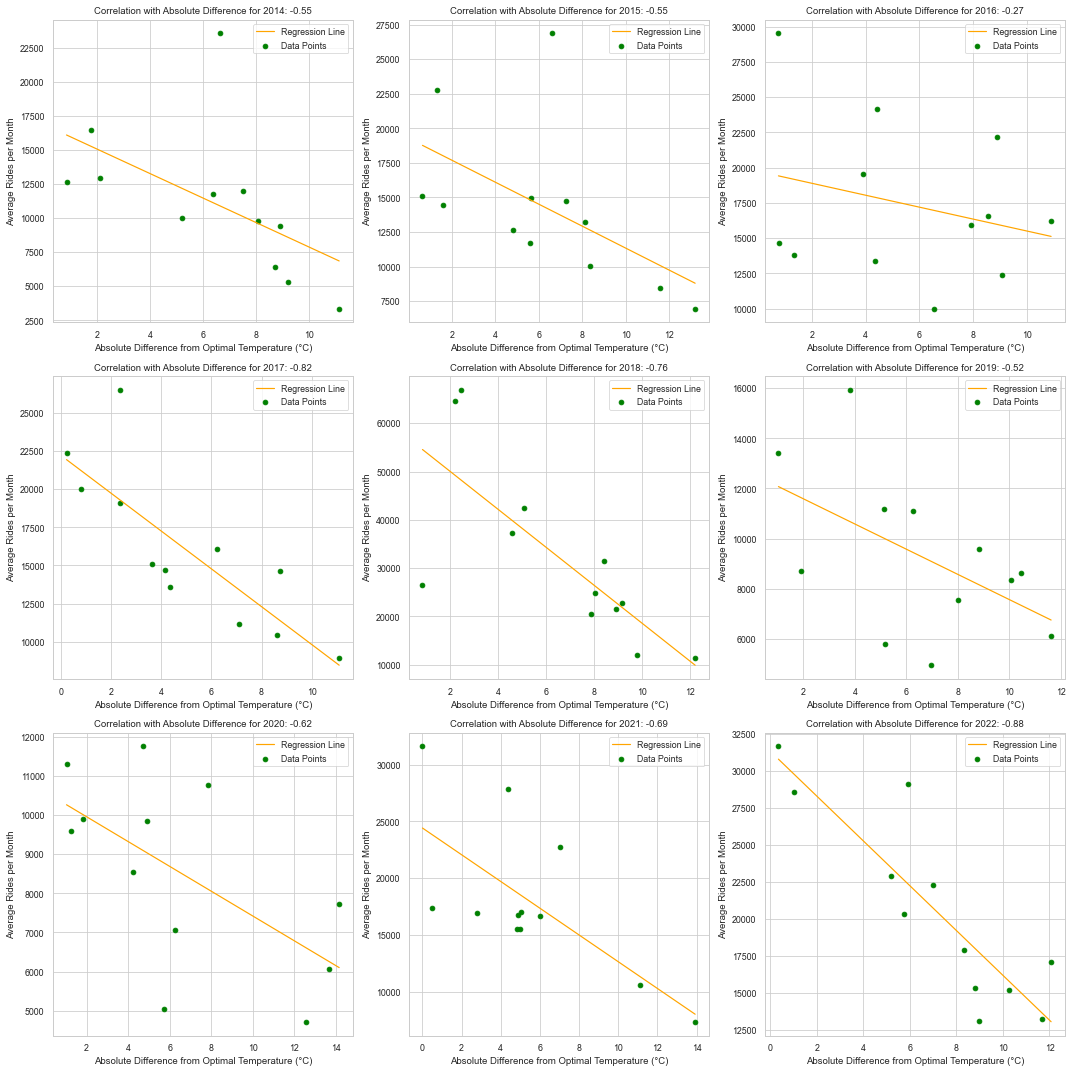

In [113]:
# Plotting with calculated optimal temperatures based on calculated optimal temp

monthly_avg_mean_temps = cleaned_weather_df.groupby(['year', 'month'])['temp'].mean()
monthly_avg_mean_temps
monthly_avg_mean_precip = cleaned_weather_df.groupby(['year', 'month'])['precip'].mean()
monthly_avg_mean_precip


grouped_month_year = cleaned_trips_df.groupby(['month', 'year'])
rides_per_month_per_year = grouped_month_year.size().reset_index(name='num_rides')

#rides_per_month_per_year = rides_per_month_per_year[(rides_per_month_per_year['year'] != 2013) & (rides_per_month_per_year['year'] != 2023)]

cats = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

rides_per_month_per_year

# Reset the index for monthly_avg_mean_temps
monthly_avg_mean_temps = monthly_avg_mean_temps.reset_index()

# Rename the month names in 'rides_per_month_per_year' to their corresponding numeric values for compatibility with other dataframes
months_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
rides_per_month_per_year['month'] = rides_per_month_per_year['month'].map(months_dict)

# Merge the two dataframes
merged_df = pd.merge(monthly_avg_mean_temps, rides_per_month_per_year, on=['year', 'month'])

# Get the unique years
years = merged_df['year'].unique()

# Configure subplot layout
num_plots = len(years)
num_cols = min(num_plots, 3)
num_rows = (num_plots - 1) // num_cols + 1

# Create figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the subplots array if necessary
if num_rows > 1:
    axs = axs.flatten()

# Iterate over years and plot correlations
for i, year in enumerate(years):
    # Filter dataframe by year
    year_df = merged_df[merged_df['year'] == year]

    # Calculate the optimal temperature for the current year
    optimal_temp = lowest_corr_dict[year][1]

    # Calculate the Absolute Difference from the Optimal Temperature
    abs_diff_temp = np.abs(year_df['temp'] - optimal_temp)

    # Calculate the correlation between Absolute Difference and average rides per month
    corr_abs_diff, _ = pearsonr(abs_diff_temp, year_df['num_rides'])

    # Plot the correlations
    ax = axs[i]
    ax.scatter(abs_diff_temp, year_df['num_rides'], color='green', label='Data Points')
    slope_abs_diff, intercept_abs_diff = np.polyfit(abs_diff_temp, year_df['num_rides'], 1)
    x_abs_diff = np.array([min(abs_diff_temp), max(abs_diff_temp)])
    y_abs_diff = slope_abs_diff * x_abs_diff + intercept_abs_diff
    ax.plot(x_abs_diff, y_abs_diff, color='orange', label='Regression Line')
    ax.set_xlabel('Absolute Difference from Optimal Temperature (°C)')
    ax.set_ylabel('Average Rides per Month')
    ax.set_title(f'Correlation with Absolute Difference for {year}: {corr_abs_diff:.2f}')
    ax.legend()

    if i + num_plots < num_rows * num_cols:
        # Calculate the correlation between precipitation and average rides per month
        corr_precip, _ = pearsonr(year_df["precip"], year_df["num_rides"])

        # Plot the correlation between precipitation and average rides per month
        ax = axs[i + num_plots]
        ax.scatter(year_df["precip"], year_df["num_rides"], color='blue', label='Data Points')
        slope_precip, intercept_precip = np.polyfit(year_df["precip"], year_df["num_rides"], 1)
        x_precip = np.array([min(year_df["precip"]), max(year_df["precip"])])
        y_precip = slope_precip * x_precip + intercept_precip
        ax.plot(x_precip, y_precip, color='red', label='Regression Line')
        ax.set_xlabel('Precipitation (mm)')
        ax.set_ylabel('Average Rides per Month')
        ax.set_title(f'Correlation with Precipitation for {year}: {corr_precip:.2f}')
        ax.legend()

# Hide unused subplots
if num_plots < num_rows * num_cols:
    for ax in axs[num_plots:]:
        ax.axis('off')

plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Correlation_temps_yearly_optimal_temp.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Correlation_temps_yearly_optimal_temp.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Correlation_temps_yearly_optimal_temp.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Correlation_temps_yearly_optimal_temp.png")

plt.show()


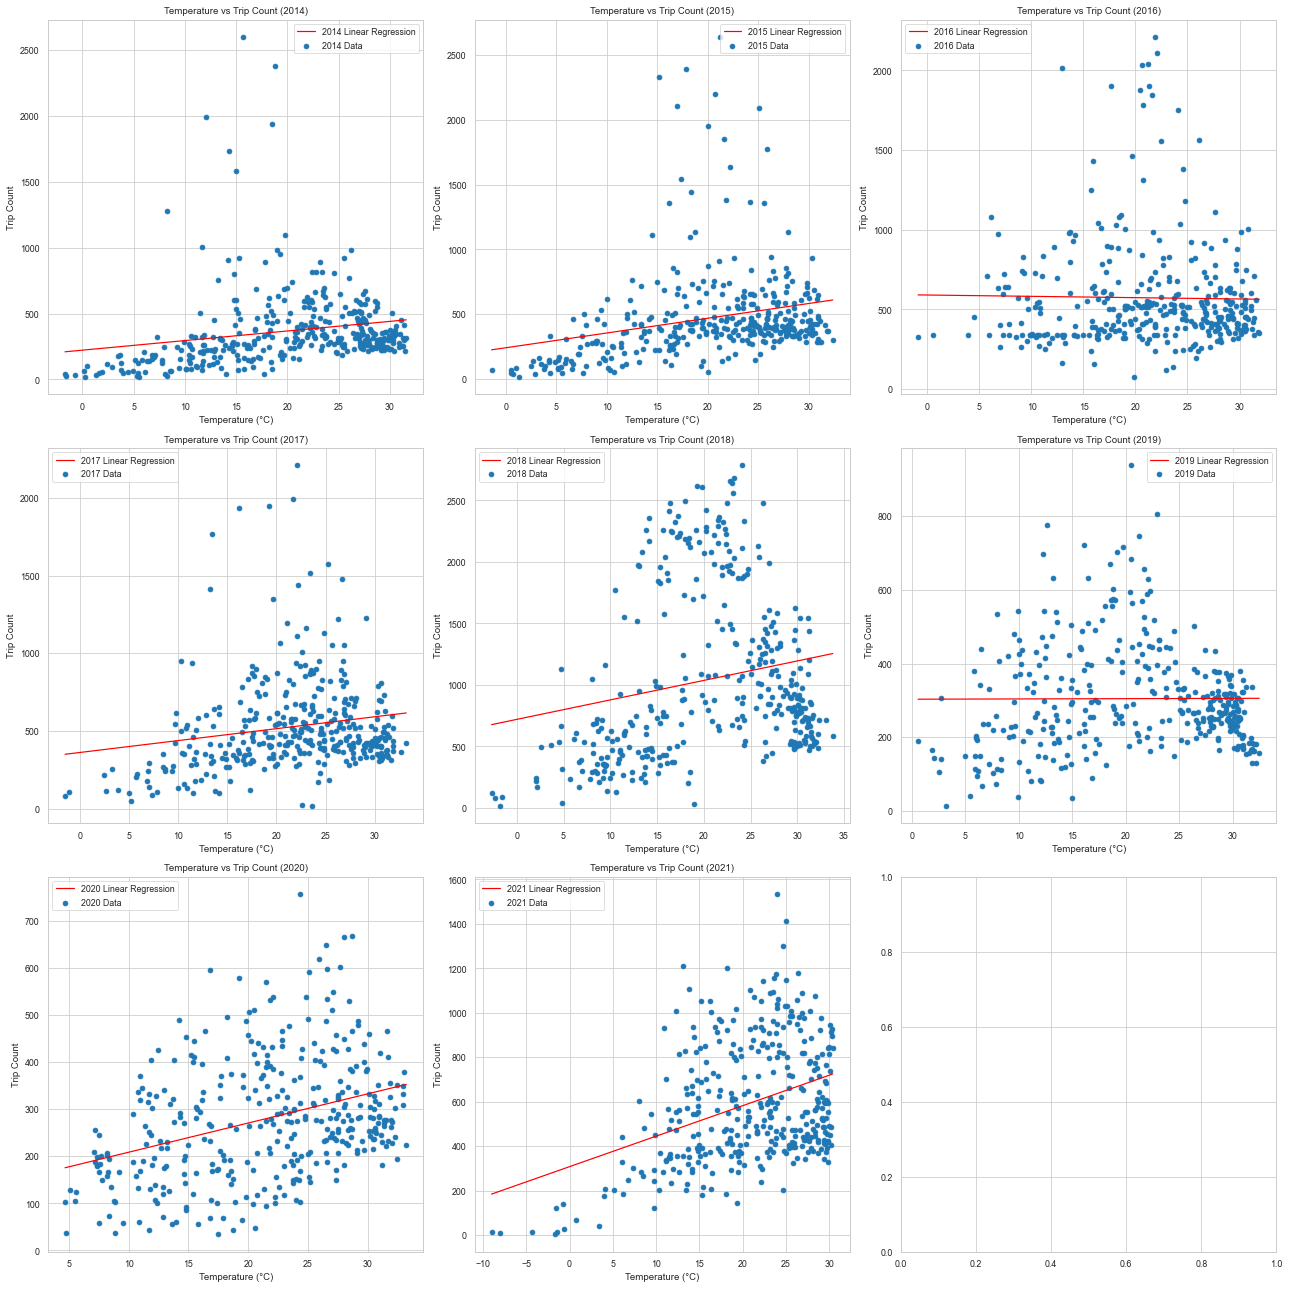

In [114]:
# Convert the 'datetime' column to datetime format
cleaned_weather_df['datetime'] = pd.to_datetime(cleaned_weather_df['datetime'])

# Extract the day of the year from the 'datetime' column
cleaned_weather_df['day_of_year'] = cleaned_weather_df['datetime'].dt.dayofyear

# Group the data by year and day_of_year and calculate the mean temperature
daily_avg_temps = cleaned_weather_df.groupby(['year', 'day_of_year'])['temp'].mean().reset_index()

# Merge 'trip_counts_per_day' and 'daily_avg_temps' on 'year' and 'day_of_year'
data = pd.merge(trip_counts_per_day.reset_index(), daily_avg_temps, on=['year', 'day_of_year'])


# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
axs = axs.flatten()  # flatten the axis array for easy iteration

for i, year in enumerate(range(2014, 2022)):
    yearly_data = data[data['year'] == year]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(yearly_data['temp'], yearly_data['trip_id'])
    
    # Generate coordinates for the regression line
    x = np.array([yearly_data['temp'].min(), yearly_data['temp'].max()])
    y = slope * x + intercept
    
    # Plot the data and the regression line on the subplot
    axs[i].scatter(yearly_data['temp'], yearly_data['trip_id'], label=f'{year} Data')
    axs[i].plot(x, y, color='red', label=f'{year} Linear Regression')
    axs[i].set_xlabel('Temperature (°C)')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Temperature vs Trip Count ({year})')
    axs[i].legend()

plt.tight_layout()

# Save files on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Correlation_temp_temps_yearly_optimal_temp.png")
# else:
#     os.mkdir(parent_folder + "\\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Correlation_temp_temps_yearly_optimal_temp.png")

# Save files on Mac/Linux
if os.path.exists(parent_folder + "/Figures"):
    plt.savefig(parent_folder + "/Figures/Correlation_temp_temps_yearly_optimal_temp.png")
else:
    os.mkdir(parent_folder + "/Figures")
    plt.savefig(parent_folder + "/Figures/Correlation_temp_temps_yearly_optimal_temp.png")

plt.show()